# Our First ML Model:

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#As always, we need to load our data (file name: race_df_with_advanced_features.pkl):
race_df = pd.read_pickle('race_df_with_advanced_features.pkl')
race_df.head(5)

qgrid_pos  Nr.       Driver      Team  fp2_pos     fp2_t  fp3_pos  \
0          3    8    F. Alonso   Ferrari      9.0  117140.0      1.0   
1          2    7     F. Massa   Ferrari      7.0  116555.0      6.0   
2          4    2  L. Hamilton   McLaren      2.0  115854.0     12.0   
3          1    5    S. Vettel  Red Bull      5.0  116459.0      5.0   
4          5    4   N. Rosberg  Mercedes      1.0  115409.0      2.0   

      fp3_t  fp1_pos     fp1_t  ...  hist_fp2_pos  hist_fp3_pos  hist_fp1_pos  \
0  114099.0      2.0  116766.0  ...           NaN           NaN           NaN   
1  114739.0      4.0  117055.0  ...           NaN           NaN           NaN   
2  115860.0      6.0  117163.0  ...           NaN           NaN           NaN   
3  114646.0     13.0  117943.0  ...           NaN           NaN           NaN   
4  114368.0      8.0  117199.0  ...           NaN           NaN           NaN   

   hist_q_pos  hist_race_pos  best_fp_pos  worst_fp_pos mean_fp_pos  \
0         NaN            NaN          1.0           3.0         2.0   
1         NaN            NaN          6.0           1.0         5.0   
2         NaN            NaN         12.0           4.0         6.0   
3         NaN            NaN          5.0          10.0         7.0   
4         NaN            NaN          2.0           5.0         1.0   

   r_hist_qgrid_pos_2_fp  r_hist_race_pos_2_fp  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 50 columns]

In [3]:
sorted(race_df.columns)

['Driver',
 'Nr.',
 'Team',
 'best_fp_pos',
 'best_fp_t',
 'champ_points',
 'finished_race',
 'fp1_pos',
 'fp1_t',
 'fp2_pos',
 'fp2_t',
 'fp3_pos',
 'fp3_t',
 'hist_fp1_pos',
 'hist_fp2_pos',
 'hist_fp3_pos',
 'hist_q_pos',
 'hist_qgrid_pos',
 'hist_race_pos',
 'is_Alfa Romeo',
 'is_AlphaTauri',
 'is_Alpine',
 'is_Aston Martin',
 'is_Caterham',
 'is_Ferrari',
 'is_HRT',
 'is_Haas F1',
 'is_Lotus',
 'is_Manor',
 'is_McLaren',
 'is_Mercedes',
 'is_Red Bull',
 'is_Williams',
 'mean_fp_pos',
 'mean_fp_t',
 'pos_gained',
 'q_pos',
 'q_t',
 'qgrid_pos',
 'r_hist_qgrid_pos_2_fp',
 'r_hist_race_pos_2_fp',
 'race_idx',
 'race_name',
 'race_num',
 'race_pos',
 'v_m_s',
 'velocity',
 'worst_fp_pos',
 'worst_fp_t',
 'year']

### Selecting the features for our first model:
For our first shot, we will only select columns starting with r_ or hist_<br>
for our features.

In [4]:
#Create a list with the feature columns, staring with r_ and hist_
feature_columns = [col for col in race_df.columns if col.startswith(('r_','hist_'))]
feature_columns

['hist_qgrid_pos',
 'hist_fp2_pos',
 'hist_fp3_pos',
 'hist_fp1_pos',
 'hist_q_pos',
 'hist_race_pos',
 'r_hist_qgrid_pos_2_fp',
 'r_hist_race_pos_2_fp']

In [5]:
y_column = 'race_pos'

### Drop NaNs
Most ML models do no like NaN values.<br>
We will have to count them, to make sure not to drop 90% of the data,<br>
then drop the rows containing a NaN

In [6]:
rows_before_drop = race_df.shape[0]
race_df = race_df[feature_columns+[y_column,'year']].dropna()#Drop the rows containing a NaN
rows_post_drop = race_df.shape[0]
rows_lost = rows_before_drop - rows_post_drop
print(f'We lost {rows_lost} of initialy {rows_before_drop}.\n{int(rows_lost/rows_before_drop*100)}% lost')

We lost 899 of initialy 4718.
19% lost


### Split our data to test and training.
As we are using gliding averages, it might not be a good idea to<br>
randomly sample. We will use the year 2020 as cut-off:

In [7]:
#Split to training and test data by using the year 2020 as filter:
X_train = race_df[race_df['year']<2020][feature_columns]
y_train = race_df[race_df['year']<2020][y_column]

X_test = race_df[race_df['year']<=2020][feature_columns]
y_test = race_df[race_df['year']<=2020][y_column]

### Building our model and fitting the data to it:

In [8]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting data with our model

In [9]:
y_pred = reg.predict(X_test)

### Looking at the numbers:

In [10]:
print(f'Regression coefficients: \t{reg.coef_}')
print(f'\nMean squared error: \t\t{mean_squared_error(y_test, y_pred)}')#Slash n starts a new line
print(f'Coefficient of determination: \t{r2_score(y_test, y_pred)}')# Slash t is a tab

Regression coefficients: 	[ 0.01903656  0.18023567  0.14182323  0.03197064  0.13979273  0.31302853
 -0.34187158 -0.50609052]

Mean squared error: 		9.980848729570075
Coefficient of determination: 	0.6546869165796498


### Visualizing the results
Use a Seaborn relplot and just add our y_pred and y_test data directly into it.<br>
We do not need to convert to a dataframe first!

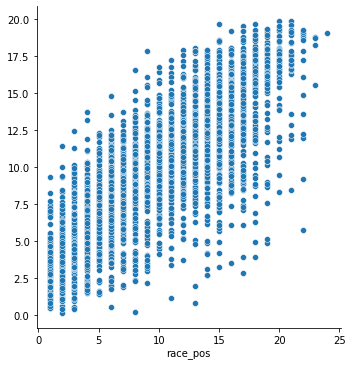

In [11]:
ml_predictions = sns.relplot(x=y_test, y=y_pred)

Is this good enough? Can we do better?

### Allready done?
Fix the plot above.